# Witful ML 01 - Exploratory Data Analysis for Linear Regression Models
by Kaan Kabalak, Editor In Chief @ witfuldata.com

# Introduction

Is machine learning something that only super smart people and math professors understand? Or is it something clearly exlainable and enjoyable? Let's find the answer together.

Welcome to the first chapter of a step-by-step machine learning tutorial series on Witful Data. The series will include tutorials on regression, classification and ensemble algorithms. Plus, essential processes like model evaluation and data preprocessing will also be included. 

My aim to is to keep everything accessible for everyone. This work will have reached its aim if everyone who has read it learned something on some level. 



This tutorial assumes that the reader knows the fundamentals of:<br>
* NumPy
* Matplotlib
* Pandas
* Seaborn


## Importing

In [1]:
#Importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Exploratory Data Analysis (EDA)

Exploratory Data Analysisis a multi-staged process through which we aim to determine the quality and validity of the insights we can gain from our analysis. While there are no "rules" about it, it is a beneficial practice to go through the steps of EDA before initiating any other form of data analysis or modeling process. EDA is carried out by following these steps:

* Loading and checking the dataset
* Checking the shape and the data types of the dataset
* Checking the dataset for missing values
* Observing descriptive statistical values for preliminary insights
* Visualizing the data

There are various EDA implementations. How these steps are to be carried out depend on the task at hand. In this case, I will explain how and why we will use EDA for this specific machine learning task.

## Loading and checking the dataset

Source: The dataset is a modified version of 
https://www.kaggle.com/datasets/uciml/autompg-dataset by UCI Machine Learning Repository

We first load the dataset into a dataframe.

In [2]:
#loading the dataset into a data frame
auto_df = pd.read_csv("auto.csv")

We then check the first and the last 5 rows of the data frame. This step will allow use to see if the dataset has been loaded as we have expected.

In [3]:
#Checking the head
auto_df.head(5)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [4]:
#Checking the tail
auto_df.tail(5)

,mpg,displ,hp,weight,accel,origin,size
387,18.0,250.0,88,3021,16.5,US,15.0
388,27.0,151.0,90,2950,17.3,US,10.0
389,29.5,98.0,68,2135,16.6,Asia,10.0
390,17.5,250.0,110,3520,16.4,US,15.0
391,25.1,140.0,88,2720,15.4,US,10.0


## Checking the shape and the data types

Most machine learning algorithms are very sensitive to the shape and the data types of the dataset. This simple step will give us an idea about how our dataset and the observations in it have been structured. While there are seperate .shape and .dtypes attributes for this, we will use .info() method which will return information about the shape and the data types at the same time. 

In [5]:
#Info
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


What does this tell us?

* There are 392 rows (entries) and 7 columns
* There is one column where the data type is string(object)
* Not all numeric values have the same data type (some are integer and some are floats

Let's check what is in the "origin" column.

In [6]:
#Checking for unique string objects
auto_df.origin.unique()

array(['US', 'Asia', 'Europe'], dtype=object)

Now, to ensure more stability, we will turn the integer values into floats.

In [7]:
#Turnin integers into floats
auto_df["hp"] = auto_df.hp.astype(float)
auto_df["weight"] = auto_df.weight.astype(float)

In [8]:
#Checking the dtypes again
auto_df.dtypes

mpg       float64
displ     float64
hp        float64
weight    float64
accel     float64
origin     object
size      float64
dtype: object

Now we have all the numeric values cast as one data type. 

## Checking for missing values

When we check the data with the .info() method, we can see if it has missing values or not. Yet, I also want to show you another way to do that. If you use .isna() with .any(), it will show "True" if any of the columns have any missing values.

In [9]:
#Checking for NaN
auto_df.isna().any()

mpg       False
displ     False
hp        False
weight    False
accel     False
origin    False
size      False
dtype: bool

## Descriptive Statistics

The .describe() method provides us with descriptive statistics (mean,median,standart deviation etc.) related to the dataset. It is an essential step thorugh which we can check the dataset for abnormalities quickly. 


In [10]:
auto_df.describe()

,mpg,displ,hp,weight,accel,size
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,13.679847
std,7.805007,104.644004,38.491160,849.402560,2.758864,4.264458
min,9.000000,68.000000,46.000000,1613.000000,8.000000,7.500000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,10.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,10.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,20.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,20.000000


## Data Visualization

This is the step which will allow us to visually explore the data. Simple Regression tasks consist of efficiently utilizing the correlation between two variables to perform a predictive analysis. Therefore, it would make sense to use a data viz which can help us better understand the correlation between the variables. Seaborn's heatmap is the right tool for this task. Here we will pass the dataframe with .corr() for Seaborn to show us a correlation heatmap. The cmap argument is for the color map which will be used. I usually prefer to use Red-Blue palette for mapping out correlation

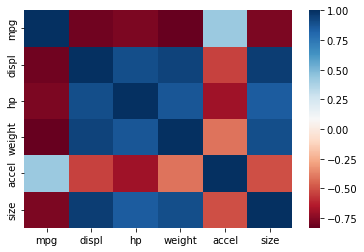

In [11]:
sns.heatmap(auto_df.corr(),cmap="RdBu")
plt.show()

A darker tone of blue stands for positive correlation. What does that mean? Within the context of this heatmap, for example, it means that there as size goes up, the engine displacement (displ) also goes up.

A darker tone of red stands for negative correlation. For example, this heatmap tells us that as size goes up, miles per galoon (mpg) go down. This makes sense, right? Big cars tend to consume more gas.

As I have said before, heatmaps like these can be used to pick variables for linear regression models. Variables with a high positive or negative correlation tend to be more suitable for ML tasks.